# Evaluating Sharpness Preservation

Get 10% and 50% MTFs for fbp, red-cnn, and red-cnn augmentation

In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
base_dir = Path('/gpfs_projects/brandon.nelson/PediatricCTSizeDataAugmentation')
phantom_dir = base_dir / 'CCT189_peds'
phantom_meta = pd.read_csv(phantom_dir / 'metadata.csv')
phantom_meta

,Name,effective diameter (cm),FOV (cm),recon,phantom,simulated,file,Dose [%]
0,35.0 cm MITA-LCD,35.0,39,RED-CNN augmented,MITA-LCD,True,/gpfs_projects/brandon.nelson/PediatricCTSizeD...,10
1,35.0 cm MITA-LCD,35.0,39,RED-CNN,MITA-LCD,True,/gpfs_projects/brandon.nelson/PediatricCTSizeD...,10
2,35.0 cm MITA-LCD,35.0,39,fbp,MITA-LCD,True,/gpfs_projects/brandon.nelson/PediatricCTSizeD...,10
3,35.0 cm MITA-LCD,35.0,39,RED-CNN augmented,MITA-LCD,True,/gpfs_projects/brandon.nelson/PediatricCTSizeD...,40
4,35.0 cm MITA-LCD,35.0,39,RED-CNN,MITA-LCD,True,/gpfs_projects/brandon.nelson/PediatricCTSizeD...,40
...,...,...,...,...,...,...,...,...
373,15.1 cm uniform,15.1,17,RED-CNN,uniform,True,/gpfs_projects/brandon.nelson/PediatricCTSizeD...,70
374,15.1 cm uniform,15.1,17,fbp,uniform,True,/gpfs_projects/brandon.nelson/PediatricCTSizeD...,70
375,15.1 cm uniform,15.1,17,RED-CNN augmented,uniform,True,/gpfs_projects/brandon.nelson/PediatricCTSizeD...,85
376,15.1 cm uniform,15.1,17,RED-CNN,uniform,True,/gpfs_projects/brandon.nelson/PediatricCTSizeD...,85


1. move the CTP404 phantom simulations from `/gpfs_projects/brandon.nelson/DLIR_Ped_Generalizability/geometric_phantom_studies/main/geometric/CTP404` to `/gpfs_projects/brandon.nelson/PediatricCTSizeDataAugmentation/CTP404_peds` - done
2. add metaheaders to make them easier to load, with pixel size and recon info? -> dicom eventually for this last one - done
3. make metadata csv like for CCT189 - done 

4. make sure Ct numbers have 0 offset, so air == -1000, water == 0 - done
5. run denoisers on the CTP dataset
6. then run /home/brandon.nelson/Dev/DLIR_Ped_Generalizability/geometric_phantom_studies/evaluation/MTF

In [3]:
!ls /gpfs_projects/brandon.nelson/PediatricCTSizeDataAugmentation/CTP404_peds/diameter112mm/dose_010/RED-CNN/

112mm_dose_010_RED-CNN.mhd  112mm_dose_010_RED-CNN.raw


In [4]:
base_dir = Path('/gpfs_projects/brandon.nelson/PediatricCTSizeDataAugmentation/CTP404_peds')
headers = [h for h in base_dir.rglob('*.mhd') if h.stem != 'true']

In [15]:
from tqdm import tqdm
import SimpleITK as sitk

phantom = 'CTP404'
names = []
diameters = []
fovs = []
recons = []
phantoms = []
doses = []
files = []


for header in tqdm(headers):
    img = sitk.ReadImage(header)
    diameter_str, dose, recon, fname = header.relative_to(base_dir).parts
    
    diameter = int(diameter_str.split('diameter')[1].split('mm')[0])/10
    name = f"{diameter} mm {phantom}"
    
    names.append(name)
    diameters.append(diameter)
    fovs.append(round(img.GetSpacing()[0]*img.GetWidth())/10)
    recons.append(recon)
    phantoms.append(phantom)
    doses.append(int(dose.split('_')[1]))
    files.append(header)
    
meta=pd.DataFrame({'name': names,
              'phantom': phantoms,
              'effective diameter [cm]': diameters,
              'FOV [cm]': fovs,
              'recon': recons,
              'Dose [%]': doses,
              'file': files})
meta

100%|█████████████████████████████████████████████████████████████████████████████████| 192/192 [00:30<00:00,  6.27it/s]


,name,phantom,effective diameter [cm],FOV [cm],recon,Dose [%],file
0,35.0 mm CTP404,CTP404,35.0,38.5,RED-CNN augmented,10,/gpfs_projects/brandon.nelson/PediatricCTSizeD...
1,35.0 mm CTP404,CTP404,35.0,38.5,RED-CNN,10,/gpfs_projects/brandon.nelson/PediatricCTSizeD...
2,35.0 mm CTP404,CTP404,35.0,38.5,fbp,10,/gpfs_projects/brandon.nelson/PediatricCTSizeD...
3,35.0 mm CTP404,CTP404,35.0,38.5,RED-CNN augmented,40,/gpfs_projects/brandon.nelson/PediatricCTSizeD...
4,35.0 mm CTP404,CTP404,35.0,38.5,RED-CNN,40,/gpfs_projects/brandon.nelson/PediatricCTSizeD...
...,...,...,...,...,...,...,...
187,15.1 mm CTP404,CTP404,15.1,16.6,RED-CNN,70,/gpfs_projects/brandon.nelson/PediatricCTSizeD...
188,15.1 mm CTP404,CTP404,15.1,16.6,fbp,70,/gpfs_projects/brandon.nelson/PediatricCTSizeD...
189,15.1 mm CTP404,CTP404,15.1,16.6,RED-CNN augmented,85,/gpfs_projects/brandon.nelson/PediatricCTSizeD...
190,15.1 mm CTP404,CTP404,15.1,16.6,RED-CNN,85,/gpfs_projects/brandon.nelson/PediatricCTSizeD...


In [16]:
# meta = pd.read_csv(base_dir/'metadata.csv')
# meta.file[0]

In [17]:
import SimpleITK as sitk
vol = sitk.ReadImage(meta.file[0])
vol.GetDepth(), vol.GetWidth(), vol.GetHeight()

(20, 512, 512)

In [18]:
meta[(meta['Dose [%]']==25)&
     (meta['effective diameter [cm]']==35)&
     (meta['FOV [cm]']==38.5)]

,name,phantom,effective diameter [cm],FOV [cm],recon,Dose [%],file
9,35.0 mm CTP404,CTP404,35.0,38.5,RED-CNN augmented,25,/gpfs_projects/brandon.nelson/PediatricCTSizeD...
10,35.0 mm CTP404,CTP404,35.0,38.5,RED-CNN,25,/gpfs_projects/brandon.nelson/PediatricCTSizeD...
11,35.0 mm CTP404,CTP404,35.0,38.5,fbp,25,/gpfs_projects/brandon.nelson/PediatricCTSizeD...


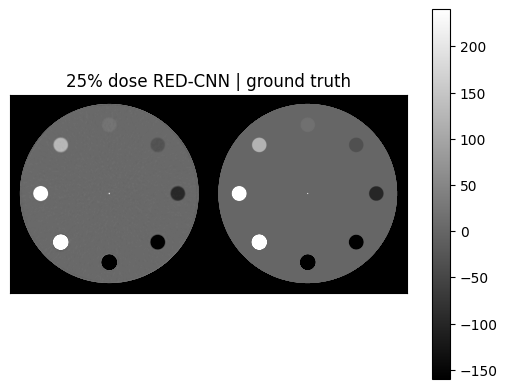

In [20]:
from results_utils import browse_studies, study_viewer
browse_studies(meta, phantom='CTP404', diameter=35, fov=38.5, dose=25, recon='RED-CNN')
plt.colorbar()

In [21]:
study_viewer(meta)

interactive(children=(Dropdown(description='phantom', options=('CTP404',), value='CTP404'), Dropdown(descripti…